## Book 7_Recurrent Neural Network_TF-IDF

In [1]:
import pandas as pd
import numpy as np

# for modelling
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score, plot_roc_curve, plot_confusion_matrix
import matplotlib.pyplot as plt

# for Model Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')
from time import time
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, roc_auc_score, plot_roc_curve, plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from time import time
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier

from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import Perceptron
from keras.models import Sequential
from keras.layers import *

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.utils import np_utils
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
import itertools

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
import numpy
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD
from keras.constraints import maxnorm

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras import utils as np_utils
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# Importing 
suicide_merged = pd.read_csv('./data/suicide_merged.csv')

In [3]:
di = {'suicide': 1, 'non-suicide' : 0}
suicide_merged['class'] = suicide_merged['class'].map(di)

In [4]:
suicide_merged.shape

(4000, 11)

In [5]:
suicide_merged['class'].value_counts()

0    2000
1    2000
Name: class, dtype: int64

In [6]:
suicide_merged['text_clean'] = suicide_merged['text_clean'].astype(str)

In [7]:
#suicide_merged['class'] = suicide_merged['class'].astype(str)

In [8]:
# assigning X and y 
X = suicide_merged['text_clean']
y = suicide_merged['class']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state=42)

In [10]:
# Initialize and fit the tokenizer
tokenizer = Tokenizer()

# Train the tokenizer and use the tokenizer to convert sentences to sequences of numbers
# where each number represents the index of the word stored in the tokenizer
tokenizer.fit_on_texts(X_train)

In [11]:
# Use that tokenizer to transform (convert) the text message strings in training and test data
# into a list of integers where each integer represents the index of that word
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [12]:
# Q: What do these sequences look like?
# Ans: sequence of numbers representing the words in each text msg
# Ans: specifically this is the integer representation of the first text msg in data set
# Ans: in other words, each integer is representing a word in the first text msg
X_train_seq[0]

[46,
 350,
 46,
 1,
 44,
 7,
 706,
 29,
 6,
 758,
 179,
 1294,
 6321,
 87,
 2,
 134,
 7,
 40,
 247,
 529,
 1,
 17,
 89,
 6,
 338,
 11,
 1,
 120,
 1,
 74,
 2,
 296,
 3,
 889,
 2865,
 779,
 63,
 6,
 167,
 162,
 1,
 116,
 14,
 15,
 85,
 212,
 1,
 130,
 88,
 300,
 88,
 300,
 690,
 587,
 121,
 86,
 82,
 3417,
 3,
 862,
 988,
 9,
 74,
 169,
 7,
 86,
 1,
 130,
 186,
 191,
 1,
 130,
 142,
 677,
 1,
 130,
 186,
 2,
 1295,
 2,
 530,
 1,
 130,
 186,
 1021,
 600,
 3,
 181,
 8,
 33,
 1,
 130,
 32,
 1,
 30,
 145,
 34,
 7,
 400,
 36,
 7,
 338,
 3418,
 125,
 199,
 11,
 19,
 345,
 8,
 3419,
 32,
 2,
 707,
 121,
 86,
 34,
 48,
 549,
 120,
 9,
 1182,
 44,
 94,
 1,
 746,
 32,
 3,
 1064,
 9,
 5,
 82,
 167,
 11,
 628,
 9,
 300,
 13,
 5,
 416,
 11,
 1,
 30,
 17,
 6,
 917,
 3,
 1875,
 113,
 2,
 76,
 32,
 22,
 34,
 1,
 144,
 3420,
 1361,
 6,
 758,
 179,
 1294,
 32,
 46,
 917,
 46,
 1,
 68,
 153,
 12,
 7,
 90,
 2246,
 10,
 1516,
 18,
 81,
 451,
 36,
 6,
 172,
 62,
 6,
 2032,
 199,
 20,
 268,
 199,
 146,
 3,
 18

In [13]:
X_train_seq_padded = pad_sequences(X_train_seq, 50)
X_test_seq_padded = pad_sequences(X_test_seq, 50)

In [14]:
X_train_seq_padded[0]

array([ 917,    3, 1875,  113,    2,   76,   32,   22,   34,    1,  144,
       3420, 1361,    6,  758,  179, 1294,   32,   46,  917,   46,    1,
         68,  153,   12,    7,   90, 2246,   10, 1516,   18,   81,  451,
         36,    6,  172,   62,    6, 2032,  199,   20,  268,  199,  146,
          3,  181,    8,   33,  199,    9])

In [15]:
# Import the tools needed from keras

# facilitate the computation of performance metrics
import keras.backend as K

# type of layers required

# RNNs have a short-memory that allow them to store the information processed by the previous layers.
# LSTMs are an extension of RNNs whose goal is to “prolong” or “extend” this internal memory
# hence allowing them to remember previous words, previous sentences or any other value from the
# beginning of a long sequence.
from keras.layers import Dense, Embedding, LSTM

# type of model required
from keras.models import Sequential

# define custom functions to calculate recall and precision
def recall_m(y_true, y_pred):
        # K.round: Element-wise rounding to the closest integer
        # K.clip: Element-wise value clipping to min and max values specified
        # K.epsilon: When there's a division operation taking place, it's often added to denominator to prevent
            # a divide by zero error. Epsilon is small value that makes very little difference to the value of 
            # the denominator, but ensures that it isn't equal to exactly zero.
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

In [16]:
# Create a RNN model
model = Sequential()

# Add Embedding layer which will take the text msg that is being passed in and create an embedding
# or vector representation of that text msg

# 'len(tokenizer.index_word)+1' refers to input dimensionality i.e. how many words are there in total
# Need to add 1 to get full dimensionality since count starts from zero
# Instructs embedding layer how many words to expect as input

# '32' refers to the output dimensionality or in other words create embeddings of length=32
# This is a parameter that you may consider tuning as part of model optimization
model.add(Embedding(len(tokenizer.index_word)+1, 32))

# LSTM (Long Short Term Memory) layer is a type of RNN layer used when the chain of input-chunks becomes longer 
# '32' refers to the outout dimensionality which equals to input dimensionality of current layer
# Since it is a sequential model the output of previous layer will be passed as input to this LSTM layer
model.add(LSTM(32))

# fully connected layer i.e. every node is layer is connected to every node in the layer before
model.add(Dense(32, activation='relu'))

# Take 32 dimensions from the layer before and output one dimension
# Condense everything down to make a prediction of either spam or ham 
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          447840    
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dense (Dense)                (None, 32)                1056      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 457,249
Trainable params: 457,249
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy', # standard option for binary target variables
              metrics=['accuracy', precision_m, recall_m]) # metrics to display

In [18]:
# Fit the RNN model
history = model.fit(X_train_seq_padded, y_train, 
                    batch_size=32, epochs=10, # batch_size = number of samples per epoch while epoch = number of loops
                    validation_data=(X_test_seq_padded, y_test)) # apply model to unseen data i.e. test data

Epoch 1/10
94/94 [==============================] - 2s 16ms/step - loss: 0.6475 - accuracy: 0.6303 - precision_m: 0.6042 - recall_m: 0.8349 - val_loss: 0.5492 - val_accuracy: 0.7090 - val_precision_m: 0.6922 - val_recall_m: 0.7835
Epoch 2/10
94/94 [==============================] - 1s 11ms/step - loss: 0.4355 - accuracy: 0.7900 - precision_m: 0.7809 - recall_m: 0.8100 - val_loss: 0.5175 - val_accuracy: 0.7210 - val_precision_m: 0.7126 - val_recall_m: 0.7620
Epoch 3/10
94/94 [==============================] - 1s 11ms/step - loss: 0.2495 - accuracy: 0.9013 - precision_m: 0.8940 - recall_m: 0.9152 - val_loss: 0.6079 - val_accuracy: 0.7040 - val_precision_m: 0.6874 - val_recall_m: 0.7747
Epoch 4/10
94/94 [==============================] - 1s 12ms/step - loss: 0.1371 - accuracy: 0.9497 - precision_m: 0.9445 - recall_m: 0.9587 - val_loss: 0.8270 - val_accuracy: 0.6910 - val_precision_m: 0.6839 - val_recall_m: 0.7333
Epoch 5/10
94/94 [==============================] - 1s 11ms/step - loss: 0.0

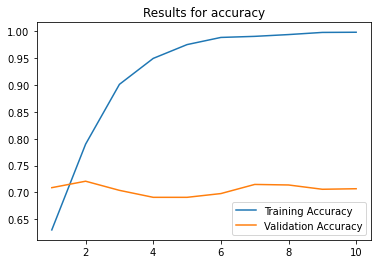

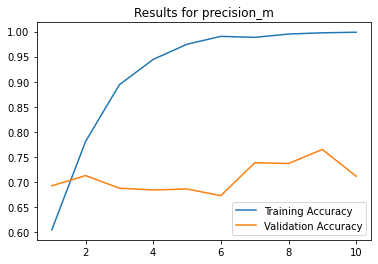

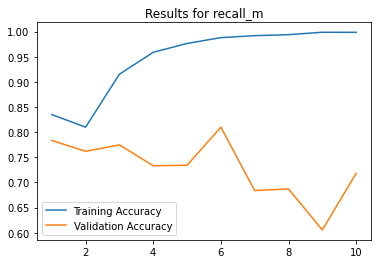

In [19]:
# Plot the evaluation metrics by each epoch for the model to see if we are over or underfitting
import matplotlib.pyplot as plt

for i in ['accuracy', 'precision_m', 'recall_m']:
    acc = history.history[i]
    val_acc = history.history['val_{}'.format(i)]
    epochs = range(1, len(acc) + 1)

    plt.figure()
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title('Results for {}'.format(i))
    plt.legend()
    plt.show()
    
    # validation accuracy, precision and recal appears to be relatively consistent over time